In [1]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot

In [2]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [4]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

sabadell = df[df['empresa'] == 'Sabadell']

sabadell.shape

(1325, 10)

In [5]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

sabadell = sabadell [['date','open','high','low','close','adj close']]

sabadell.shape

(1325, 6)

In [6]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

sabadell['date'] = pd.to_datetime(sabadell['date'], format="%Y-%m-%d")

sabadell.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 8625 to 9949
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [7]:
# Paso 5: Ordenar el DF por fecha

sabadell.sort_values(by='date',ascending= True, inplace=True)

sabadell.head()

,date,open,high,low,close,adj close
9511,2019-01-02,0.968372,0.988567,0.947685,0.986104,0.823138
9510,2019-01-03,0.977041,0.997433,0.970342,0.982755,0.820342
9509,2019-01-04,0.992508,1.031912,0.987582,1.028465,0.858498
9508,2019-01-07,1.034375,1.036345,1.016151,1.031912,0.861375
9507,2019-01-08,1.033390,1.043734,1.021076,1.032898,0.862198


In [8]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

sabadell = sabadell[(sabadell['date'] >= fecha_inicio) & (sabadell['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

sabadell.shape

(812, 6)

In [9]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=sabadell['date'].min(), end=sabadell['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

sabadell = sabadell.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

sabadell = sabadell.rename(columns={'index': 'date'})

In [10]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

sabadell.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,0.3584,0.3600,0.3433,0.3478,0.312256
1,2021-01-05,0.3435,0.3638,0.3435,0.3606,0.323748
2,2021-01-06,0.3666,0.3912,0.3619,0.3836,0.344398
3,2021-01-07,0.3820,0.4078,0.3711,0.4078,0.366124
4,2021-01-08,0.4091,0.4091,0.3921,0.3957,0.355261
5,2021-01-09,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,0.3946,0.4081,0.3850,0.3949,0.354543
8,2021-01-12,0.4000,0.4199,0.3988,0.4140,0.371691
9,2021-01-13,0.4184,0.4184,0.3960,0.3973,0.356698


In [11]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

sabadell = sabadell.fillna(method='ffill')

In [13]:
# Paso 10: Comprobar que se han introducido los valores correctamente


sabadell.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,0.3584,0.3600,0.3433,0.3478,0.312256
1,2021-01-05,0.3435,0.3638,0.3435,0.3606,0.323748
2,2021-01-06,0.3666,0.3912,0.3619,0.3836,0.344398
3,2021-01-07,0.3820,0.4078,0.3711,0.4078,0.366124
4,2021-01-08,0.4091,0.4091,0.3921,0.3957,0.355261
5,2021-01-09,0.4091,0.4091,0.3921,0.3957,0.355261
6,2021-01-10,0.4091,0.4091,0.3921,0.3957,0.355261
7,2021-01-11,0.3946,0.4081,0.3850,0.3949,0.354543
8,2021-01-12,0.4000,0.4199,0.3988,0.4140,0.371691
9,2021-01-13,0.4184,0.4184,0.3960,0.3973,0.356698


In [14]:
# Paso 11: Establecer columna 'date' como índice para modelo

sabadell = sabadell.set_index('date')

sabadell.head(10)

,open,high,low,close,adj close
date,,,,,
2021-01-04,0.3584,0.3600,0.3433,0.3478,0.312256
2021-01-05,0.3435,0.3638,0.3435,0.3606,0.323748
2021-01-06,0.3666,0.3912,0.3619,0.3836,0.344398
2021-01-07,0.3820,0.4078,0.3711,0.4078,0.366124
2021-01-08,0.4091,0.4091,0.3921,0.3957,0.355261
2021-01-09,0.4091,0.4091,0.3921,0.3957,0.355261
2021-01-10,0.4091,0.4091,0.3921,0.3957,0.355261
2021-01-11,0.3946,0.4081,0.3850,0.3949,0.354543
2021-01-12,0.4000,0.4199,0.3988,0.4140,0.371691


In [15]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

sabadell.index = pd.DatetimeIndex(sabadell.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

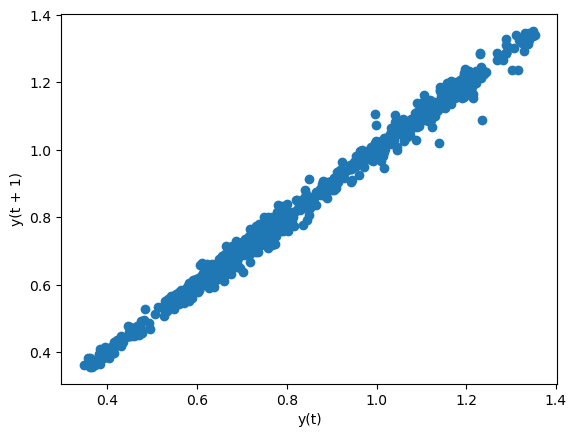

In [16]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(sabadell.close)

In [17]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [18]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = sabadell.close[:-10], sabadell.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [19]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [20]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(sabadell.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    1.174562
2024-02-22    1.174125
2024-02-23    1.173689
2024-02-24    1.173255
2024-02-25    1.172822
2024-02-26    1.172391
2024-02-27    1.171961
2024-02-28    1.171532
2024-02-29    1.171105
2024-03-01    1.170679
Freq: D, dtype: float64

In [21]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    1.1635
2024-02-22    1.1905
2024-02-23    1.1935
2024-02-24    1.1935
2024-02-25    1.1935
2024-02-26    1.2145
2024-02-27    1.2250
2024-02-28    1.2225
2024-02-29    1.1970
2024-03-01    1.2395
Freq: D, Name: close, dtype: float64

In [22]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

0.032900413285194066

In [23]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,1.1635,1.174562,0.011062
2024-02-22,1.1905,1.174125,-0.016375
2024-02-23,1.1935,1.173689,-0.019811
2024-02-24,1.1935,1.173255,-0.020245
2024-02-25,1.1935,1.172822,-0.020678
2024-02-26,1.2145,1.172391,-0.042109
2024-02-27,1.2250,1.171961,-0.053039
2024-02-28,1.2225,1.171532,-0.050968
2024-02-29,1.1970,1.171105,-0.025895
2024-03-01,1.2395,1.170679,-0.068821
